In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
#imputer imports
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
#male female nan fill
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
# Check if GPU is available for TensorFlow
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.config.list_physical_devices('GPU')
##testing of model imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
import tensorflow as tf


Num GPUs Available:  0


importing all the nessecary files

we will follow 3 steps for the data
1- data preprocessing
2- model selection
3- data prediction

In [31]:
df=pd.read_csv("/content/ML101_train_dataset.csv")
df_clean_Systolic = df.dropna(subset=['Systolic BP'])
df_clean_Diastolic = df.dropna(subset=['Diastolic BP'])
df_clean_LifeStyle = df.dropna(subset=['LifeStyle'])


*   we have the Systolic BP, Diastolic BP and LifeStyle as the target attributes so any data points that have nan values cant be used as we dont have the target corresponding to that data point
*   we divided the dataframe in 3 parts so that we dont drop too much data and we can use datapoints that have systolic but not diastolic

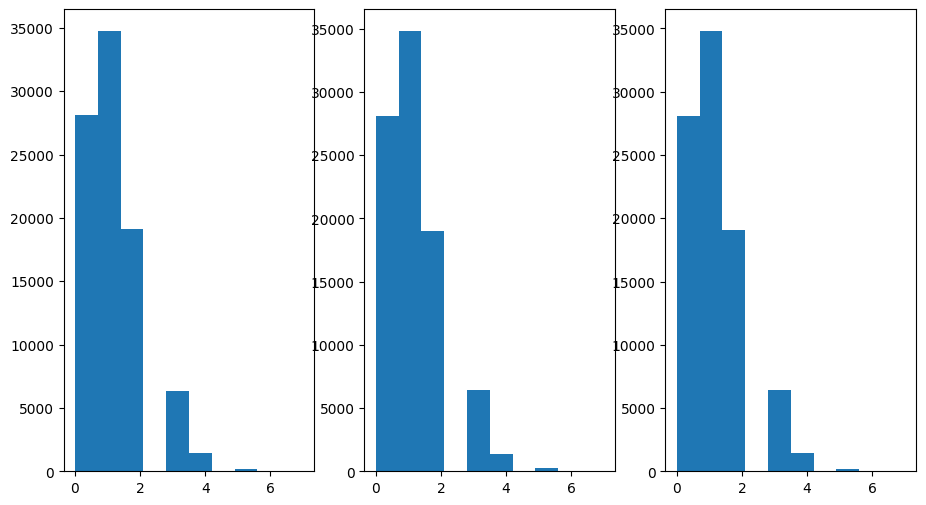

In [32]:

plt.figure(figsize=(11, 3 * 2))  # You might want to adjust the size based on your actual layout
plt.subplot(1,3,1)
nan_count = df_clean_Systolic.isna().sum(axis=1)
plt.hist(np.array(nan_count))
plt.subplot(1,3,2)
nan_count = df_clean_Diastolic.isna().sum(axis=1)
plt.hist(np.array(nan_count))
plt.subplot(1,3,3)
nan_count = df_clean_LifeStyle.isna().sum(axis=1)
plt.hist(np.array(nan_count))
plt.show()

as seen from the above graphs we are going to drop hte datapoints having too many misssing values we select 3 values as missing values as it doesnt drop too many datapoints and it also accounts for missing points


In [33]:
df_clean_Systolic = df_clean_Systolic.drop(['Diastolic BP', 'LifeStyle'], axis=1)
df_clean_Diastolic = df_clean_Diastolic.drop(['Systolic BP', 'LifeStyle'], axis=1)
df_clean_LifeStyle = df_clean_LifeStyle.dropna(subset=['Diastolic BP', 'Systolic BP'])

In [5]:
df_clean_Systolic.shape

(90000, 10)

we completely seprate the 3 dataframes from eachother ^(as shown above)

In [6]:
df_clean_Systolic['nan_count'] = df_clean_Systolic.isna().sum(axis=1)
df_filtered_Systolic = df_clean_Systolic[df_clean_Systolic['nan_count'] <= 2]
df_clean_Diastolic['nan_count'] = df_clean_Diastolic.isna().sum(axis=1)
df_filtered_Diastolic = df_clean_Diastolic[df_clean_Diastolic['nan_count'] <= 2]
df_clean_LifeStyle['nan_count'] = df_clean_LifeStyle.isna().sum(axis=1)
df_filtered_LifeStyle = df_clean_LifeStyle[df_clean_LifeStyle['nan_count'] <= 2]

In [7]:
numerical_cols = df_clean_LifeStyle.select_dtypes(include=[np.number]).columns.tolist()[:-1]

now we see that whether we plot the histogram of all the attrbutes to get a better insite of what the data is like

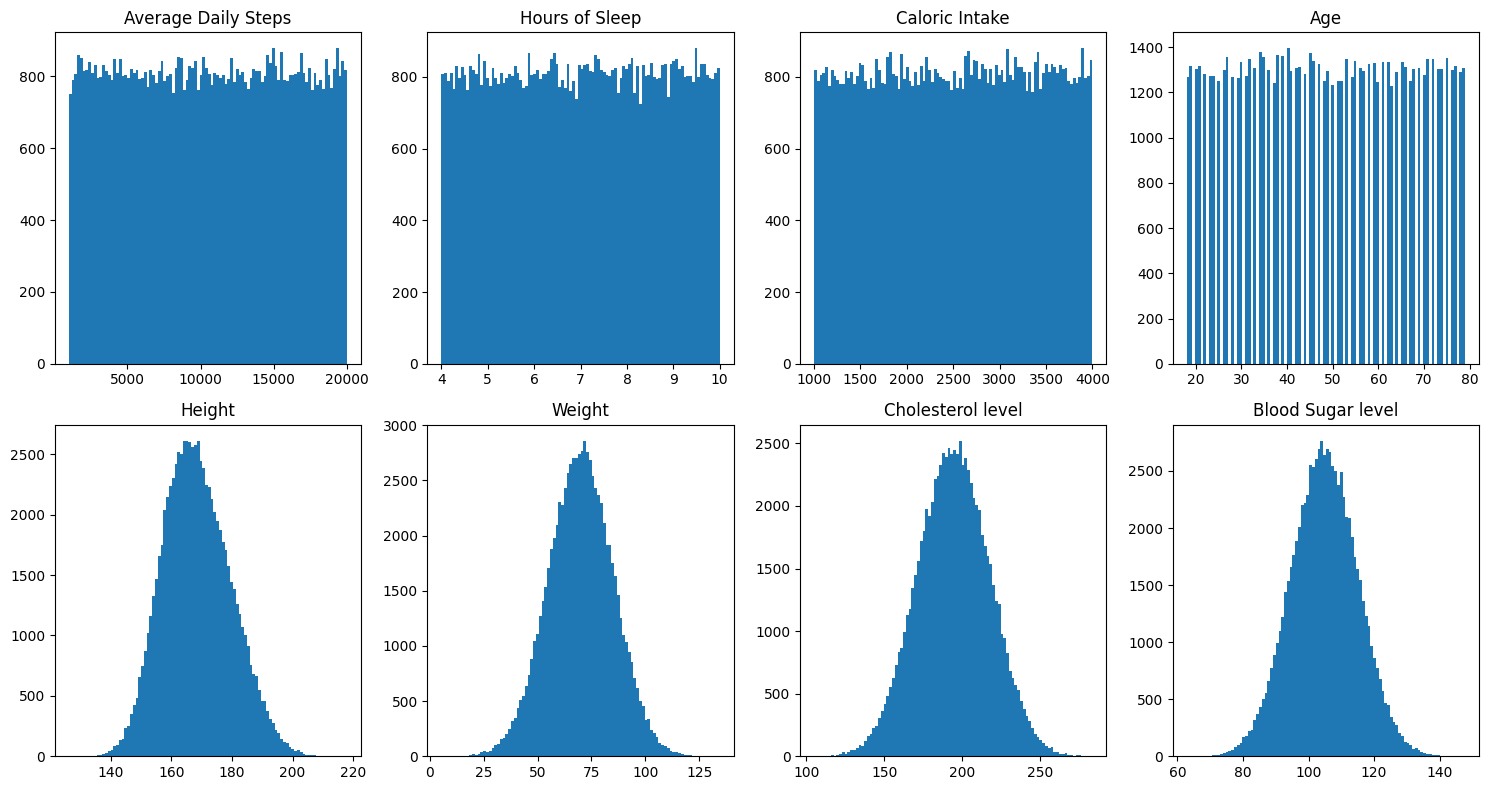

In [8]:
num_plots = len(numerical_cols)
num_cols = 4 # or however many columns you want per row
num_rows = int(np.ceil(num_plots / num_cols))

plt.figure(figsize=(15, num_rows * 4))  # You might want to adjust the size based on your actual layout

for indx, i in enumerate(numerical_cols):
    plt.subplot(num_rows, num_cols, indx + 1)  # Subplot indices start at 1
    plt.hist(df_clean_Systolic[i],bins=100)  # Reduced the number of bins for readability
    plt.title(i)

plt.tight_layout()  # This will help to ensure that layouts do not overlap
plt.show()

now all these have normal values
*   Average Daily Steps:- range 1000.0-19999.0
*   Hours of Sleep:- range from 4.00-9.99 still looks normal
*   Hours of caloric intake:- range from 1000.0-3999.0 still looks normal
*  Hours of Age:- range from 18.0-79.0 still looks normal
*   Hours of Height:- range from 126.21-214.210 still looks normal
*   Hours of Weight:- range from 5.47-134.39 still looks normal
*   Hours of Cholesterol:- range from 107.06-279.45 still looks normal
*   Hours of Blood Sugar Level:- range from 62.81-147.76 still looks normal





when we look at the systolic and diastolic blood pressure it has the following graphs and we see that it has a quite a lot of outpliers


*   in systolic blood pressure as well as in diastolic BP


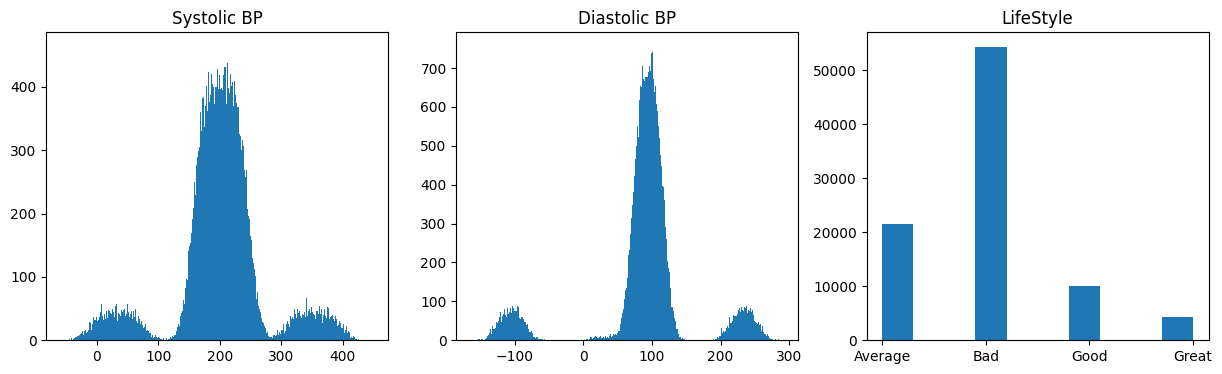

In [19]:
num_plots = 3
num_cols = 3 # or however many columns you want per row
num_rows = int(np.ceil(num_plots / num_cols))
plt.figure(figsize=(15, num_rows * 4))  # You might want to adjust the size based on your actual layout
plt.subplot(1,3,1)
plt.title("Systolic BP")
plt.hist(df_clean_Systolic['Systolic BP'],bins=1000)
plt.subplot(1,3,2)
plt.hist(df_clean_Diastolic['Diastolic BP'],bins=1000)
plt.title("Diastolic BP")
plt.subplot(1,3,3)
plt.hist(df_clean_LifeStyle['LifeStyle'])
plt.title("LifeStyle")
plt.show()

***foreshadoing***
now the data of systolic BP and the Diastolic BP  looks too suspicious 🤔 having a multimodal gaussian like histogram we tried 2 things

* use all the data   
* cut the left and right gaussian so that it

we in our testing see that the regression have mean squared error of 5000
in case 1 and in case 2 after removal it has mse of 56(approx you will see later)


now we see that the data is really bizare we have this data on humans we see that the systolic blood pressure is negetive and the distolic blood pressute is more than systolic blood pressure **which can never happen in humans so we tryed to remove the data points that we like this diastolic>systolic pressure**
but we saw that it lead to better accuracy in case of systolic and diastolic but wosrst accuracy in case of classification so we dropped this idea


```
column=df.columns.to_list()
df_clean=df_clean[(df_clean["Systolic BP"]>=80) & ((df["Systolic BP"] <= 200))]
df_clean=df_clean[(df_clean["Diastolic BP"]>=50) & ((df["Diastolic BP"] <= 170))]
df_clean=df_clean.reset_index(drop=True)
nan_counts = df.isna().sum()
print(nan_counts.to_string())
```
*we later dropped this idea as we got to know the data was designed this way and this method would lead to worst accuracy anyway*
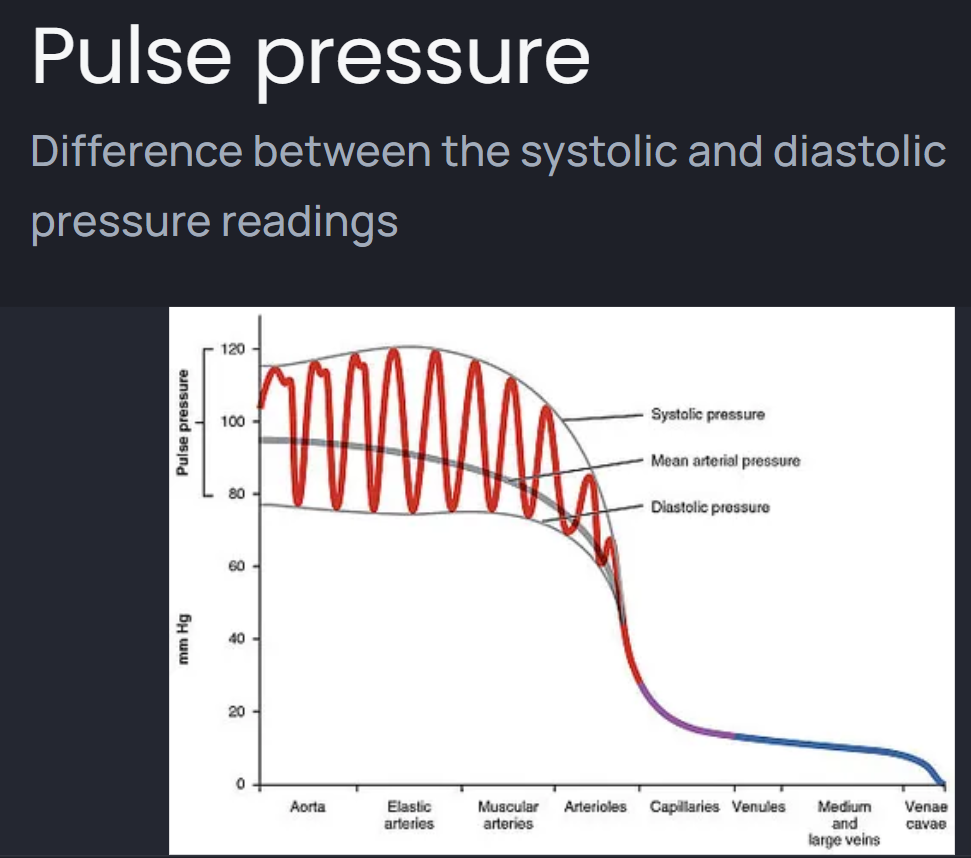



---


now we will fill the nan values in all the 3 dataframes using MICE technique
we have multiple models like
*   linear regression
*   ridge regression
*   lasso regression
*   decission tree regression





In [20]:
def apply_mice_and_get_imputed_df(df, target_cols):
    # Select numerical columns only

    # Exclude target columns for features
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()[:-1]
    X = df[numerical_cols].drop(target_cols, axis=1)
    y = df[target_cols]

    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the candidate imputers (you can adjust these as per your requirement)
    imputers = {
        "Linear Regression": IterativeImputer(estimator=LinearRegression(), max_iter=10,tol=1e-8, random_state=0),
        "Ridge Regression": IterativeImputer(estimator=Ridge(), max_iter=10,tol=1e-8, random_state=0),
        "Lasso": IterativeImputer(estimator=Lasso(), max_iter=8,tol=1e-8, random_state=0),
        # "Decision Tree": IterativeImputer(estimator=DecisionTreeRegressor(), verbose=0, max_iter=10, tol=1e-8, imputation_order='roman')
    }

    results = {}

    for name, imputer in imputers.items():
        print(f"Processing {name}...")

        # Impute missing values
        X_train_imputed = imputer.fit_transform(X_train)
        X_val_imputed = imputer.transform(X_val)

        # Model training and prediction can be on the complete dataset (X, y) rather than just validation set
        model = MultiOutputRegressor(LinearRegression())
        model.fit(X_train_imputed, y_train)

        # Predict and evaluate
        y_pred = model.predict(X_val_imputed)
        mse = mean_squared_error(y_val, y_pred, multioutput='raw_values')
        rmse = np.sqrt(mse)

        # Store the results
        results[name] = rmse.mean()

    # Choose the best imputer and apply it to the whole dataset
    best_imputer_name = min(results, key=results.get)
    best_imputer = imputers[best_imputer_name]
    print(f"***Best imputer is: {best_imputer_name} with RMSE: {results[best_imputer_name]}")

    # Impute the whole dataset and return as a new dataframe
    df_imputed = df.copy()
    df_imputed[numerical_cols] = best_imputer.fit_transform(df[numerical_cols])

    return df_imputed

# Target columns for each dataframe (you'll need to replace 'target_col1' with the actual target column names)
target_cols_systolic = ['Systolic BP']  # replace with actual column name if different
target_cols_diastolic = ['Diastolic BP']  # replace with actual column name if different

# Applying function to each dataframe
df_imputed_Systolic = apply_mice_and_get_imputed_df(df_clean_Systolic, target_cols_systolic)
df_imputed_Diastolic = apply_mice_and_get_imputed_df(df_clean_Diastolic, target_cols_diastolic)

# You can now proceed with your analyses on df_imputed_Systolic, df_imputed_Diastolic, and df_imputed_LifeStyle

Processing Linear Regression...
Processing Ridge Regression...
Processing Lasso...
***Best imputer is: Lasso with RMSE: 68.54810953918269
Processing Linear Regression...
Processing Ridge Regression...
Processing Lasso...
***Best imputer is: Lasso with RMSE: 73.00721385757939


our data frames after imputation are of length 90000 and they ar ereally good and now what we will do is remove the outliers that we saw in the systolicBP adn the Diastolic BP

In [21]:
df_imputed_Systolic_outlier_corrected = df_imputed_Systolic[(df_imputed_Systolic["Systolic BP"] > 110) & (df_imputed_Systolic["Systolic BP"] < 280)]
df_imputed_Diastolic_outlier_corrected = df_imputed_Diastolic[(df_imputed_Diastolic["Diastolic BP"] > 40) & (df_imputed_Diastolic["Diastolic BP"] < 150)]

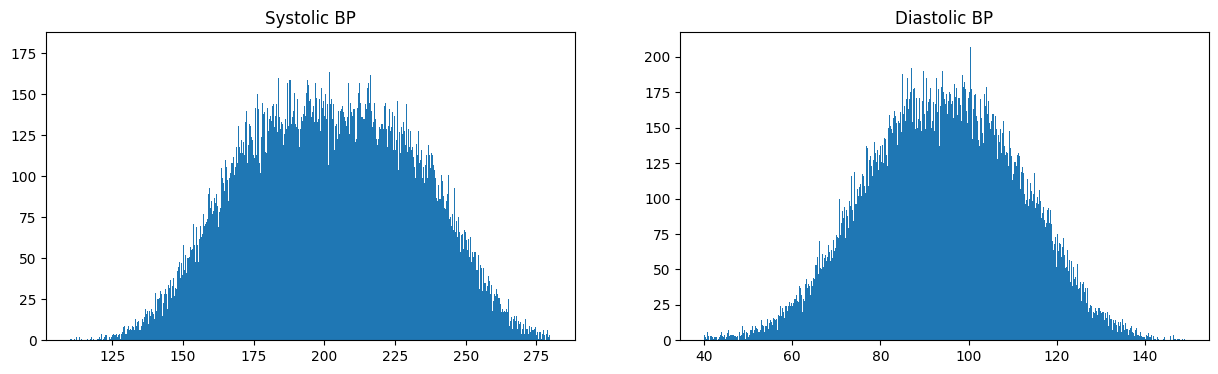

In [22]:
num_plots = 2
num_cols = 2 # or however many columns you want per row
num_rows = int(np.ceil(num_plots / num_cols))
plt.figure(figsize=(15, num_rows * 4))  # You might want to adjust the size based on your actual layout
plt.subplot(1,2,1)
plt.title("Systolic BP")
plt.hist(df_imputed_Systolic_outlier_corrected['Systolic BP'],bins=1000)
plt.subplot(1,2,2)
plt.hist(df_imputed_Diastolic_outlier_corrected['Diastolic BP'],bins=1000)
plt.title("Diastolic BP")
plt.show()



---

now we have filled the nan values for all the numerical data and then we will fill the nan values in the "Gender" data so we can use that as well to fill those values we will use a deep learning model that will use the values of other attributes to caluclate the value of the "Gender"
we will fill the nan values for both of our data frame

In [ ]:
def predict_gender(df):
    # Ensure 'Gender' is numerical
    if df['Gender'].dtype == object:
        df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

    # Separate into known and unknown 'Gender'
    known_gender_df = df[df['Gender'].notna()]
    unknown_gender_df = df[df['Gender'].isna()]

    # Prepare features and target for the known dataset
    X = known_gender_df.drop('Gender', axis=1)
    y = known_gender_df['Gender']

    # Normalize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Define the deep learning model structure
    def create_deep_model(input_shape):
        model = Sequential([
            Dense(64, activation='relu', input_shape=(input_shape,)),
            Dropout(0.3),
            Dense(128, activation='relu'),
            Dropout(0.3),
            Dense(64, activation='relu'),
            Dropout(0.3),
            Dense(1, activation='sigmoid')
        ])
        model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0008), metrics=['accuracy'])
        return model

    # Prepare the deep model
    input_shape = X_scaled.shape[1]
    deep_model = create_deep_model(input_shape)

    # Split the dataset for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

    # Train the deep model
    deep_model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.1, verbose=0,
                   callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)])

    # Evaluate the model (optional)
    scores = deep_model.evaluate(X_test, y_test, verbose=0)
    print(f'Accuracy: {scores[1]*100:.2f}%')

    # Prepare the data with unknown 'Gender' for predictions
    X_unknown = unknown_gender_df.drop(['Gender'], axis=1)
    X_unknown_scaled = scaler.transform(X_unknown)

    # Predict the 'Gender' using the deep model
    predicted_gender_prob = deep_model.predict(X_unknown_scaled)
    predicted_gender = (predicted_gender_prob > 0.5).astype(int).reshape(-1)

    # Add predicted 'Gender' to the unknown dataframe
    unknown_gender_df['Gender'] = predicted_gender

    # Combine known and predicted dataframes
    completed_df = pd.concat([known_gender_df, unknown_gender_df], ignore_index=True)

    # Print a success message (optional)
    print("Missing 'Gender' values predicted and data combined successfully.")

    return completed_df
df_imputed_Systolic_fully_corrected=predict_gender(df_imputed_Systolic_outlier_corrected)
df_imputed_Diastolic_fully_corrected=predict_gender(df_imputed_Diastolic_outlier_corrected)

now we have completed our preprocessing of the regression part of the question so now we test that which model is best for our data

In [ ]:
def find_best_model(df, target_col):
    # Assuming 'nan_count' is not a feature, and all other columns are features used for prediction.
    X = df.drop(['nan_count', target_col], axis=1)
    y = df[[target_col]]  # Target variable

    # Splitting and scaling the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Models dictionary
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(),
        'Lasso Regression': Lasso(),
        'ElasticNet Regression': ElasticNet(),
        'Decision Tree Regression': DecisionTreeRegressor(),
        'Random Forest Regression': RandomForestRegressor(),
        'Gradient Boosting': GradientBoostingRegressor(),
        'XGBoost': XGBRegressor(),
        'LightGBM': LGBMRegressor(),
        #'SVR': SVR(),
    }

    performance = {}  # To track the performance of each model

    # Function to train and evaluate models
    def train_and_evaluate(models, X_train, y_train, X_test, y_test):
        for name, model in models.items():
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)
            mse = mean_squared_error(y_test, predictions)
            rmse = np.sqrt(mse)
            performance[name] = rmse
            print(f'{name} - RMSE: {rmse}')

    train_and_evaluate(models, X_train_scaled, y_train, X_test_scaled, y_test)

    # Neural Network section
    def build_neural_network(input_shape):
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(128, activation='relu', input_shape=(input_shape,)),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(1)  # Predicting one output
        ])

        model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
        return model

    nn_model = build_neural_network(X_train_scaled.shape[1])
    history = nn_model.fit(X_train_scaled, y_train, epochs=5, batch_size=10, validation_split=0.1, verbose=1)
    loss, rmse = nn_model.evaluate(X_test_scaled, y_test, verbose=0)
    print(f'Neural Network - RMSE: {rmse}')
    performance['Neural Network'] = rmse

    # Determine the best model
    best_model = min(performance, key=performance.get)
    best_score = performance[best_model]

    return best_model, best_score

In [ ]:
best_model_systolic, best_score_systolic = find_best_model(df_imputed_Systolic_fully_corrected, 'Systolic BP')
best_model_diastolic, best_score_diastolic = find_best_model(df_imputed_Diastolic_outlier_corrected, 'Diastolic BP')
print(f"The best model for Systolic BP is {best_model_systolic} with a score of {best_score_systolic}")
print(f"The best model for Diastolic BP is {best_model_diastolic} with a score of {best_score_diastolic}")

Linear Regression - RMSE: 10.39925302549836
Ridge Regression - RMSE: 10.399253304216106
Lasso Regression - RMSE: 10.688142073272255
ElasticNet Regression - RMSE: 14.463998962030942
Decision Tree Regression - RMSE: 13.412151747936194


<ipython-input-176-2a21fb22d92f>:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Random Forest Regression - RMSE: 9.483783980741372


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting - RMSE: 9.312890300178955
XGBoost - RMSE: 9.368911127199215
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003701 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2042
[LightGBM] [Info] Number of data points in the train set: 59098, number of used features: 9
[LightGBM] [Info] Start training from score 201.844403


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LightGBM - RMSE: 9.185325386605392


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR - RMSE: 10.534945872256333
Epoch 1/5
5319/5319 [==============================] - 8s 1ms/step - loss: 1312.3103 - root_mean_squared_error: 36.2258 - val_loss: 106.9224 - val_root_mean_squared_error: 10.3403
Epoch 2/5
5319/5319 [==============================] - 7s 1ms/step - loss: 201.4590 - root_mean_squared_error: 14.1936 - val_loss: 111.8390 - val_root_mean_squared_error: 10.5754
Epoch 3/5
5319/5319 [==============================] - 7s 1ms/step - loss: 190.1759 - root_mean_squared_error: 13.7904 - val_loss: 111.0737 - val_root_mean_squared_error: 10.5391
Epoch 4/5
5319/5319 [==============================] - 7s 1ms/step - loss: 180.3648 - root_mean_squared_error: 13.4300 - val_loss: 107.0689 - val_root_mean_squared_error: 10.3474
Epoch 5/5
5319/5319 [==============================] - 7s 1ms/step - loss: 173.8484 - root_mean_squared_error: 13.1852 - val_loss: 104.5727 - val_root_mean_squared_error: 10.2261
Neural Network - RMSE: 10.690839767456055
Linear Regression - RMSE: 8.079

<ipython-input-176-2a21fb22d92f>:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Random Forest Regression - RMSE: 7.621393101058102


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting - RMSE: 7.579079170121486
XGBoost - RMSE: 7.419227807894493
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003468 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2042
[LightGBM] [Info] Number of data points in the train set: 58580, number of used features: 9
[LightGBM] [Info] Start training from score 94.403164


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LightGBM - RMSE: 7.306760624230802


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR - RMSE: 8.18302841038558
Epoch 1/5
5273/5273 [==============================] - 8s 1ms/step - loss: 268.6034 - root_mean_squared_error: 16.3891 - val_loss: 75.3744 - val_root_mean_squared_error: 8.6818
Epoch 2/5
5273/5273 [==============================] - 7s 1ms/step - loss: 89.3590 - root_mean_squared_error: 9.4530 - val_loss: 68.7976 - val_root_mean_squared_error: 8.2944
Epoch 3/5
5273/5273 [==============================] - 7s 1ms/step - loss: 85.3122 - root_mean_squared_error: 9.2365 - val_loss: 69.3375 - val_root_mean_squared_error: 8.3269
Epoch 4/5
5273/5273 [==============================] - 7s 1ms/step - loss: 81.9162 - root_mean_squared_error: 9.0508 - val_loss: 70.4604 - val_root_mean_squared_error: 8.3941
Epoch 5/5
5273/5273 [==============================] - 7s 1ms/step - loss: 79.9801 - root_mean_squared_error: 8.9432 - val_loss: 68.5568 - val_root_mean_squared_error: 8.2799
Neural Network - RMSE: 8.193872451782227
The best model for Systolic BP is LightGBM with a sco

in both the cases we are getting better values with lightGBM model so we are going to use that

In [16]:
pip install scikit-optimize


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 4.0 MB/s eta 0:00:00


using the best mode to find the predictions of the data

In [36]:
from skopt import BayesSearchCV
from skopt.callbacks import DeltaYStopper, DeadlineStopper, VerboseCallback
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

def fine_tune_lgbm(df, target_col):
    # Prepare dataset
    X = df.drop(['nan_count', target_col], axis=1)
    y = df[target_col]

    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scaling the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize the model
    lgbm = LGBMRegressor()

    # Define the search space
    search_spaces = {
        'learning_rate': (0.01, 0.5, 'log-uniform'),
        'num_leaves': (31, 127),
        'reg_alpha': (0.1, 0.5),
        'reg_lambda': (0.1, 0.5),
        'n_estimators': (100, 300)
        # Add any other parameters you'd like to tune
    }

    n_iter_search = 40  # Defining this for clarity and use in the callback

    # Create a callback for verbose output
    verbose_callback = VerboseCallback(n_total=n_iter_search)  # Here, we fix the parameter

    # Initialize the BayesSearch optimizer
    opt = BayesSearchCV(
        lgbm,
        search_spaces,
        scoring='neg_root_mean_squared_error',
        n_jobs=-1,
        n_iter=n_iter_search,  # Using the variable here
        verbose=0,
        refit=True,
        cv=3
    )

    # Use callback to print progress
    opt.fit(X_train_scaled, y_train, callback=[verbose_callback])

    # Get the results
    best_params = opt.best_params_
    best_score = opt.best_score_

    print(f"Best parameters: {best_params}")
    print(f"Best RMSE (negative): {best_score}")

    return opt.best_estimator_, best_params, best_score

best_model, best_params, best_score = fine_tune_lgbm(df_imputed_Systolic_fully_corrected, 'Systolic BP')
best_model, best_params, best_score = fine_tune_lgbm(df_imputed_Diastolic_fully_corrected, 'Diastolic BP')

Iteration No: 1 started. Searching for the next optimal point.
Iteration No: 1 ended. Search finished for the next optimal point.
Time taken: 5.7818
Function value obtained: 9.1134
Current minimum: 9.1134
Iteration No: 2 started. Searching for the next optimal point.
Iteration No: 2 ended. Search finished for the next optimal point.
Time taken: 4.0020
Function value obtained: 9.5700
Current minimum: 9.1134
Iteration No: 3 started. Searching for the next optimal point.
Iteration No: 3 ended. Search finished for the next optimal point.
Time taken: 1.6368
Function value obtained: 9.2272
Current minimum: 9.1134
Iteration No: 4 started. Searching for the next optimal point.
Iteration No: 4 ended. Search finished for the next optimal point.
Time taken: 4.6397
Function value obtained: 10.0111
Current minimum: 9.1134
Iteration No: 5 started. Searching for the next optimal point.
Iteration No: 5 ended. Search finished for the next optimal point.
Time taken: 4.2329
Function value obtained: 9.296

In [41]:
final_train_diastolic=df_imputed_Diastolic_fully_corrected.drop(['nan_count'],axis=1)
final_train_Systolic=df_imputed_Systolic_fully_corrected.drop(['nan_count'],axis=1)

,Average Daily Steps,Hours of Sleep,Caloric Intake,Age,Gender,Height,Weight,Cholesterol level,Blood Sugar level,Diastolic BP
0,15725.000000,6.518042,1714.000000,56.0,1.0,178.416872,75.489346,185.408550,104.442836,75.552416
1,7424.000000,4.856772,1366.000000,46.0,1.0,182.281966,63.578372,212.625051,106.649132,87.816911
2,11853.000000,9.727244,2189.000000,32.0,0.0,170.769825,59.397202,205.440351,121.982302,99.791603
3,16484.000000,4.380561,2373.000000,25.0,1.0,170.328269,88.357153,200.153204,101.648647,93.742647
4,17563.000000,4.195405,1547.000000,78.0,0.0,159.352113,62.381498,164.797289,95.894504,72.226524
...,...,...,...,...,...,...,...,...,...,...
73220,15288.000000,8.109178,1491.000000,40.0,0.0,163.191812,62.974543,202.299905,102.790895,84.041922
73221,10462.330476,7.314950,2563.850131,23.0,0.0,165.894818,70.147073,181.165289,107.128999,111.792713
73222,5139.000000,9.778847,3341.000000,21.0,1.0,177.851618,38.689398,228.115326,97.986203,108.366839
73223,9304.000000,7.524464,3329.000000,52.0,0.0,159.164443,88.104083,160.591950,115.696521,102.294296


In [ ]:
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Assuming final_train is loaded somewhere above

# Split your original data into features and target
X_original = final_train_Systolic.drop(['Systolic BP'], axis=1)
y_original = final_train_Systolic['Systolic BP']

# Initialize and train the scaler on the original data
scaler = StandardScaler()
X_original_scaled = scaler.fit_transform(X_original)

# Initialize and fit the label encoder on the original data's 'Gender' column
label_encoder = LabelEncoder()
final_train['Gender'] = label_encoder.fit_transform(final_train['Gender'])

# Use the best parameters to instantiate the LGBMRegressor
best_model = LGBMRegressor(learning_rate=0.05075828861771471, n_estimators=300, num_leaves=31, reg_alpha=0.5, reg_lambda=0.5)

# Train the model
best_model.fit(X_original_scaled, y_original)

# Now, preprocess and predict the new data
new_data = pd.read_csv('/content/ML101_dataset_test_feature.csv')

# Preprocess new data
new_data['Gender'] = new_data['Gender'].replace({'Male': 1, 'Female': 0})
new_data_scaled = scaler.transform(new_data)

# Predict new data
predictions1 = best_model.predict(new_data_scaled)


In [45]:
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Assuming final_train is loaded somewhere above

# Split your original data into features and target
X_original = final_train_diastolic.drop(['Diastolic BP'], axis=1)
y_original = final_train_diastolic["Diastolic BP"]

# Initialize and train the scaler on the original data
scaler = StandardScaler()
X_original_scaled = scaler.fit_transform(X_original)

# Initialize and fit the label encoder on the original data's 'Gender' column
label_encoder = LabelEncoder()
final_train['Gender'] = label_encoder.fit_transform(final_train['Gender'])

# Use the best parameters to instantiate the LGBMRegressor
best_model = LGBMRegressor(learning_rate=0.05075828861771471, n_estimators=300, num_leaves=31, reg_alpha=0.5, reg_lambda=0.5)

# Train the model
best_model.fit(X_original_scaled, y_original)

# Now, preprocess and predict the new data
new_data = pd.read_csv('/content/ML101_dataset_test_feature.csv')

# Preprocess new data
new_data['Gender'] = new_data['Gender'].replace({'Male': 1, 'Female': 0})
new_data_scaled = scaler.transform(new_data)

# Predict new data
predictions2 = best_model.predict(new_data_scaled)



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004439 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2042
[LightGBM] [Info] Number of data points in the train set: 73225, number of used features: 9
[LightGBM] [Info] Start training from score 94.388979


In [49]:
dic={'Systolic BP':predictions1,'Diastolic BP':predictions2,'ID':np.arange(0,5000)}
final=pd.DataFrame(dic)
final.to_csv("output.csv")
from google.colab import files
files.download('output.csv')

code to download the CSV of regression of the data



---



---



---



classfiication of the health of person

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Check if GPU is available for TensorFlow
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.config.list_physical_devices('GPU')

Num GPUs Available:  0


[]

In [35]:
df_clean_LifeStyle.isna().sum()

Average Daily Steps    7235
Hours of Sleep         7341
Caloric Intake         7355
Age                    7299
Gender                 7234
Height                 7351
Weight                 7294
Cholesterol level      7316
Blood Sugar level      7314
Systolic BP               0
Diastolic BP              0
LifeStyle                 0
dtype: int64

In [36]:
def apply_mice_and_get_imputed_df(df, target_cols):
    # Select numerical columns only

    # Exclude target columns for features
    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()[:-1]
    X = df[numerical_cols].drop(target_cols, axis=1)
    y = df[target_cols]

    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the candidate imputers (you can adjust these as per your requirement)
    imputers = {
        "Linear Regression": IterativeImputer(estimator=LinearRegression(), max_iter=10,tol=1e-8, random_state=0),
        "Ridge Regression": IterativeImputer(estimator=Ridge(), max_iter=10,tol=1e-8, random_state=0),
        "Lasso": IterativeImputer(estimator=Lasso(), max_iter=8,tol=1e-8, random_state=0),
        # "Decision Tree": IterativeImputer(estimator=DecisionTreeRegressor(), verbose=0, max_iter=10, tol=1e-8, imputation_order='roman')
    }

    results = {}

    for name, imputer in imputers.items():
        print(f"Processing {name}...")

        # Impute missing values
        X_train_imputed = imputer.fit_transform(X_train)
        X_val_imputed = imputer.transform(X_val)

        # Model training and prediction can be on the complete dataset (X, y) rather than just validation set
        model = MultiOutputRegressor(LinearRegression())
        model.fit(X_train_imputed, y_train)

        # Predict and evaluate
        y_pred = model.predict(X_val_imputed)
        mse = mean_squared_error(y_val, y_pred, multioutput='raw_values')
        rmse = np.sqrt(mse)

        # Store the results
        results[name] = rmse.mean()

    # Choose the best imputer and apply it to the whole dataset
    best_imputer_name = min(results, key=results.get)
    best_imputer = imputers[best_imputer_name]
    print(f"***Best imputer is: {best_imputer_name} with RMSE: {results[best_imputer_name]}")

    # Impute the whole dataset and return as a new dataframe
    df_imputed = df.copy()
    df_imputed[numerical_cols] = best_imputer.fit_transform(df[numerical_cols])

    return df_imputed

# Target columns for each dataframe (you'll need to replace 'target_col1' with the actual target column names)
target_cols_systolic = ['Systolic BP']  # replace with actual column name if different
target_cols_diastolic = ['Diastolic BP']  # replace with actual column name if different

# Applying function to each dataframe
df_imputed_LifeStyle = apply_mice_and_get_imputed_df(df_clean_LifeStyle, target_cols_systolic)
# You can now proceed with your analyses on df_imputed_Systolic, df_imputed_Diastolic, and df_imputed_LifeStyle

Processing Linear Regression...
Processing Ridge Regression...
Processing Lasso...
***Best imputer is: Lasso with RMSE: 68.3148977587531


In [37]:
def predict_gender(df):
    # Ensure 'Gender' is numerical
    if df['Gender'].dtype == object:
        df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

    # Separate into known and unknown 'Gender'
    known_gender_df = df[df['Gender'].notna()]
    unknown_gender_df = df[df['Gender'].isna()]

    # Prepare features and target for the known dataset
    X = known_gender_df.drop(['Gender','LifeStyle'], axis=1)
    y = known_gender_df['Gender']

    # Normalize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Define the deep learning model structure
    def create_deep_model(input_shape):
        model = Sequential([
            Dense(64, activation='relu', input_shape=(input_shape,)),
            Dropout(0.3),
            Dense(128, activation='relu'),
            Dropout(0.3),
            Dense(64, activation='relu'),
            Dropout(0.3),
            Dense(1, activation='sigmoid')
        ])
        model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0008), metrics=['accuracy'])
        return model

    # Prepare the deep model
    input_shape = X_scaled.shape[1]
    deep_model = create_deep_model(input_shape)

    # Split the dataset for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

    # Train the deep model
    deep_model.fit(X_train, y_train, epochs=5, batch_size=10, validation_split=0.1, verbose=1,
                   callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)])

    # Evaluate the model (optional)
    scores = deep_model.evaluate(X_test, y_test, verbose=0)
    print(f'Accuracy: {scores[1]*100:.2f}%')

    # Prepare the data with unknown 'Gender' for predictions
    X_unknown = unknown_gender_df.drop(['Gender', 'LifeStyle'], axis=1)
    X_unknown_scaled = scaler.transform(X_unknown)

    # Predict the 'Gender' using the deep model
    predicted_gender_prob = deep_model.predict(X_unknown_scaled)
    predicted_gender = (predicted_gender_prob > 0.5).astype(int).reshape(-1)

    # Add predicted 'Gender' to the unknown dataframe
    unknown_gender_df['Gender'] = predicted_gender

    # Combine known and predicted dataframes
    completed_df = pd.concat([known_gender_df, unknown_gender_df], ignore_index=True)

    # Print a success message (optional)
    print("Missing 'Gender' values predicted and data combined successfully.")

    return completed_df
df_imputed_LifeStyle_fully_corrected=predict_gender(df_imputed_LifeStyle)


Epoch 1/10
4139/4139 [==============================] - 8s 2ms/step - loss: 0.4650 - accuracy: 0.7824 - val_loss: 0.4564 - val_accuracy: 0.7853
Epoch 2/10
4139/4139 [==============================] - 6s 1ms/step - loss: 0.4500 - accuracy: 0.7904 - val_loss: 0.4524 - val_accuracy: 0.7871
Epoch 3/10
4139/4139 [==============================] - 8s 2ms/step - loss: 0.4483 - accuracy: 0.7928 - val_loss: 0.4547 - val_accuracy: 0.7860
Epoch 4/10
4139/4139 [==============================] - 6s 1ms/step - loss: 0.4464 - accuracy: 0.7939 - val_loss: 0.4543 - val_accuracy: 0.7884
Epoch 5/10
4139/4139 [==============================] - 7s 2ms/step - loss: 0.4466 - accuracy: 0.7941 - val_loss: 0.4509 - val_accuracy: 0.7873
Epoch 6/10
4139/4139 [==============================] - 6s 1ms/step - loss: 0.4449 - accuracy: 0.7955 - val_loss: 0.4548 - val_accuracy: 0.7912
Epoch 7/10
4139/4139 [==============================] - 7s 2ms/step - loss: 0.4445 - accuracy: 0.7941 - val_loss: 0.4530 - val_accuracy:

<ipython-input-37-bd0f7e16e4eb>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unknown_gender_df['Gender'] = predicted_gender


In [38]:
df_imputed_LifeStyle_fully_corrected['LifeStyle'].replace({'Bad':0,'Average':1,'Good':2,'Great':3})

0        1
1        1
2        0
3        0
4        0
        ..
72915    0
72916    0
72917    0
72918    0
72919    0
Name: LifeStyle, Length: 72920, dtype: int64

In [39]:
df_imputed_LifeStyle_fully_corrected = df_imputed_LifeStyle_fully_corrected[(df_imputed_LifeStyle_fully_corrected["Systolic BP"] > 110) & (df_imputed_LifeStyle_fully_corrected["Systolic BP"] < 280)]
df_imputed_LifeStyle_fully_corrected = df_imputed_LifeStyle_fully_corrected[(df_imputed_LifeStyle_fully_corrected["Diastolic BP"] > 40) & (df_imputed_LifeStyle_fully_corrected["Diastolic BP"] < 150)]

(48704, 12)


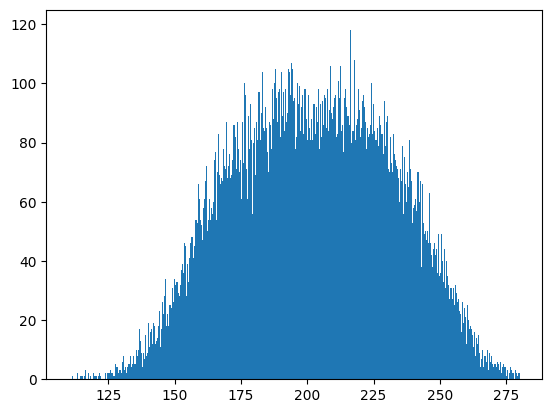

In [40]:
print(df_imputed_LifeStyle_fully_corrected.shape)
plt.hist(df_imputed_LifeStyle_fully_corrected["Systolic BP"],bins=1000)
plt.show()


In [41]:
df_imputed_LifeStyle_fully_corrected['LifeStyle'] = df_imputed_LifeStyle_fully_corrected['LifeStyle'].replace({'Bad':0,'Average':1,'Good':2,'Great':3})


In [61]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

# Prepare data
X = df_imputed_LifeStyle_fully_corrected.drop(["LifeStyle"], axis=1)
y = df_imputed_LifeStyle_fully_corrected["LifeStyle"]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Models to evaluate
models = {
    # "Logistic Regression": LogisticRegression(max_iter=1000),
    # "SVM": SVC(),
    # "KNN": KNeighborsClassifier(),
    # "Naive Bayes": GaussianNB(),
     "Gradient Boosting": GradientBoostingClassifier(),
     "Random Forest": RandomForestClassifier(),
    # "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

best_accuracy = 0
best_model_name = ""

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict and evaluate
    predictions = model.predict(X_test)
    acc = accuracy_score(y_test, predictions)

    # Check if this model is the best so far
    if acc > best_accuracy:
        best_accuracy = acc
        best_model_name = name

    print(f"{name} Accuracy: {acc * 100:.2f}%")
    print(f"Current Best Model: {best_model_name} with {best_accuracy * 100:.2f}% accuracy\n")


Gradient Boosting Accuracy: 94.53%
Current Best Model: Gradient Boosting with 94.53% accuracy

Random Forest Accuracy: 94.55%
Current Best Model: Random Forest with 94.55% accuracy

XGBoost Accuracy: 94.49%
Current Best Model: Random Forest with 94.55% accuracy



we have chosen random forest as from the above code and the image below we have the following accuracies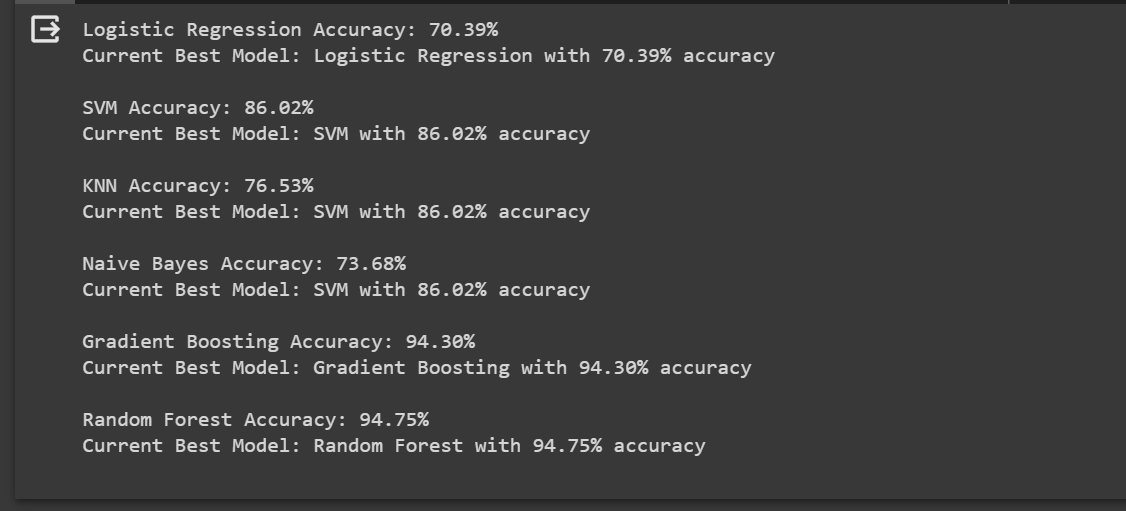

now fine tuning the classification model

In [42]:
from sklearn.model_selection import GridSearchCV

# Parameters to be tuned
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest classifier
rf = RandomForestClassifier()

# Custom callback to print current and best scores
def custom_callback(cv_results_):
    current_score = cv_results_['mean_test_score'][-1]
    max_score = max(cv_results_['mean_test_score'])
    print(f"Current Accuracy: {current_score * 100:.2f}%")
    print(f"Max Accuracy Between Sets: {max_score * 100:.2f}%\n")

# Mock GridSearchCV class to add our callback
class CustomGridSearchCV(GridSearchCV):
    def _run_search(self, evaluate_candidates):
        super()._run_search(evaluate_candidates)
        custom_callback(self.cv_results_)

# Initialize CustomGridSearchCV
grid_search = CustomGridSearchCV(estimator=rf, param_grid=param_grid,
                                cv=2, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit data to CustomGridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_ * 100)


Fitting 2 folds for each of 24 candidates, totalling 48 fits


KeyboardInterrupt: ignored

now forming the data for the pridiction of the dataset

In [46]:
a=pd.read_csv("/content/output.csv")
new_data = pd.read_csv('/content/ML101_dataset_test_feature.csv')

In [47]:
new_data['Diastolic BP']=a['Diastolic BP']
new_data['Systolic BP']=a['Systolic BP']

In [50]:
columns=new_data.columns.to_list()
columns

['Average Daily Steps',
 'Hours of Sleep',
 'Caloric Intake',
 'Age',
 'Gender',
 'Height',
 'Weight',
 'Cholesterol level',
 'Blood Sugar level',
 'Diastolic BP',
 'Systolic BP']

In [56]:
olumns

['Average Daily Steps',
 'Hours of Sleep',
 'Caloric Intake',
 'Age',
 'Height',
 'Weight',
 'Cholesterol level',
 'Blood Sugar level',
 'Diastolic BP',
 'Systolic BP']

In [59]:
from sklearn.ensemble import RandomForestClassifier

X = df_imputed_LifeStyle_fully_corrected.drop(["LifeStyle","Gender"], axis=1)
y = df_imputed_LifeStyle_fully_corrected["LifeStyle"]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
# Best parameters (replace with your best parameters)
# best_params = {
#     'n_estimators': ...,  # replace with your value
#     'max_depth': ...,
#     'min_samples_split': ...,
#     'min_samples_leaf': ...,
#     'bootstrap': ...
# }

rf_best = RandomForestClassifier()
rf_best.fit(X_train, y_train)  # Assuming X_train and y_train were already defined in previous steps

# Predict the 'LifeStyle' using the best model
# new_data=new_data.drop("Gender",axis=1)
columns=new_data.columns.to_list()
predictions = rf_best.predict(new_data[columns])

# Convert numerical predictions back to original LifeStyle values
lifestyle_mapping = {0: 'Bad', 1: 'Average', 2: 'Good', 3: 'Great'}  # Adjust if necessary
predicted_lifestyle = [lifestyle_mapping[pred] for pred in predictions]

print(predicted_lifestyle)


['Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad', 'Bad'

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


we have seen that the data is 95% accurate from above but is giving bad in all the data

In [62]:
dic={'LifeStyle':predicted_lifestyle,'ID':np.arange(0,5000)}
final=pd.DataFrame(dic)
final.to_csv("output2.csv")
from google.colab import files
files.download('output2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>